# Class 11: Part 1

NYU Tandon C4SUE @avigailvantu , April 2020

## Working and displaying line and polygon data 
GeoPandas can produce maps pretty quickly, with just a few lines of code. Today will look further into some data types and learn how not only create a map, but also how to control some aspects. In the first section of this class we will look into line data of bike lanes, polygon data (senior safe zones), and point data 

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline 

import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon

Today we will see a few additional ways to work with spatial data on Jupyter. Last week we touched upon transforming data from dataframe into geodataframe. This is a cool way to map and visualize x,y data that comes in CSV files. Today we will load shpfiles into Jupyter. Because this is a geo based data it let's us visualize the data right away.

# NYC Bike Lanes 



In [2]:
#here I am loading the bike lanes data
#note that I am loading all files in the folder, hence I do not specify the data extension (.shp)
bike_lane = gpd.read_file('Bicycle Routes')

In [3]:
bike_lane.head()

,allclasses,bikedir,boro,comments,facilitycl,fromstreet,ft_facilit,instdate,lanecount,moddate,onoffst,segmentid,street,tf_facilit,tostreet,geometry
0,III,L,4.0,None,III,WOODHAVEN BLVD,None,2016-11-25T00:00:00,1.0,2016-11-25T00:00:00,ON,150483.0,63 AVE,Sharrows,82 PLACE,"LINESTRING (-73.87218 40.72316, -73.87138 40.7..."
1,II,L,3.0,None,II,W 37 ST,None,2005-08-01T00:00:00,1.0,2005-08-01T00:00:00,ON,9009151.0,NEPTUNE AV,Standard,BRIGHTON 8 ST,"LINESTRING (-74.00067 40.57717, -74.00110 40.5..."
2,II,R,4.0,None,II,SHORE PKWY SR,Standard,2008-04-01T00:00:00,1.0,2008-04-01T00:00:00,ON,252570.0,84 ST,None,157 AV,"LINESTRING (-73.84938 40.66235, -73.84932 40.6..."
3,I,2,3.0,Prospect Park Auto-Free Hours: Closed to Cars,I,PROSPECT PARK W,Greenway,1980-07-01T00:00:00,2.0,1980-07-01T00:00:00,OFF,253073.0,P P BARTEL PRITCHARD SQ APPR,Greenway,WEST DR,"LINESTRING (-73.97951 40.66105, -73.97927 40.6..."
4,II,R,1.0,None,II,CANAL ST,Standard,2008-04-01T00:00:00,1.0,2008-04-01T00:00:00,ON,313087.0,GREENWICH ST,None,GANSEVOORT ST,"LINESTRING (-74.00921 40.72530, -74.00919 40.7..."


Note that we already have a geometry column in the data. This means we can visualize the data right away ----> 

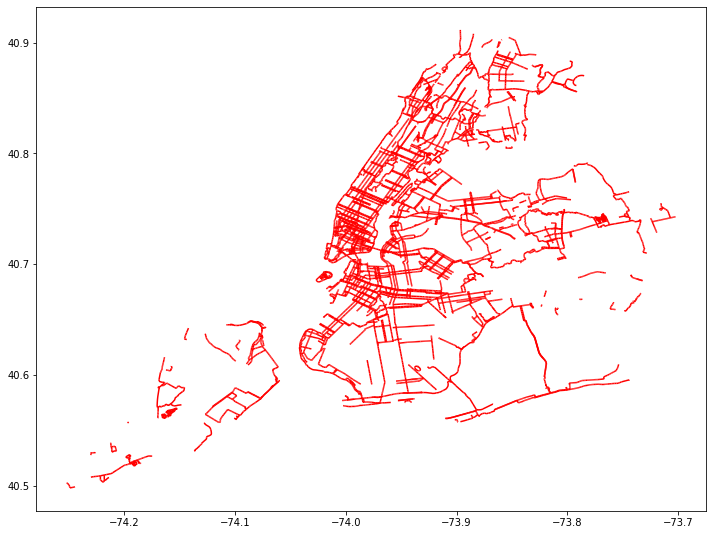

In [4]:


bike_lane.plot( color='red',legend=True,figsize=(12, 12),markersize=0.1)

Now let's check out more functionalities.. 

In [5]:
#knowing what the columns in the data
bike_lane.columns

Index(['allclasses', 'bikedir', 'boro', 'comments', 'facilitycl', 'fromstreet',
       'ft_facilit', 'instdate', 'lanecount', 'moddate', 'onoffst',
       'segmentid', 'street', 'tf_facilit', 'tostreet', 'geometry'],
      dtype='object')

I now want to filter the data and display it by the boro column. Note the boro columns contains numeric values (1-5), and not the actual name. Let's check it out: 

In [6]:
bike_lane['boro']

0        4.0
1        3.0
2        4.0
3        3.0
4        1.0
        ... 
18725    2.0
18726    2.0
18727    2.0
18728    2.0
18729    2.0
Name: boro, Length: 18730, dtype: float64

# Working with the NYC boro codes:

These are the numeric code--borough names. 

1. Manhattan (New York County)
2. Bronx (Bronx County)
3. Brooklyn (Kings County)
4. Queens (Queens County)
5. Staten Island (Richmond County)

In [7]:
#let's filter to only have Manhattan's bike lanes: 

bike_lane[bike_lane['boro']==1].head(3)

,allclasses,bikedir,boro,comments,facilitycl,fromstreet,ft_facilit,instdate,lanecount,moddate,onoffst,segmentid,street,tf_facilit,tostreet,geometry
4,II,R,1.0,None,II,CANAL ST,Standard,2008-04-01T00:00:00,1.0,2008-04-01T00:00:00,ON,313087.0,GREENWICH ST,None,GANSEVOORT ST,"LINESTRING (-74.00921 40.72530, -74.00919 40.7..."
5,I,L,1.0,None,I,W 96 ST,None,2010-08-01T00:00:00,1.0,2010-08-01T00:00:00,ON,37218.0,COLUMBUS AV,Protected Path,W 77 ST,"LINESTRING (-73.97217 40.78649, -73.97168 40.7..."
8,III,L,1.0,None,III,CHERRY ST,None,2017-07-05T00:00:00,1.0,2017-07-05T00:00:00,ON,9005896.0,JACKSON ST,Sharrows,MADISON ST,"LINESTRING (-73.98082 40.71324, -73.98081 40.7..."


In [8]:
len(bike_lane[bike_lane['boro']==1])

5266

We get only bike lanes that are inside Manhattan, there are a total of 5266 of them!

# Filter data while plotting to plot one borough at time

This feature is extremely useful to narrow down the map, but it requires having categories in the data to work with. Luckily for us the bike lane data comes with the boro code so this is all pretty straight forward. If this was not imidiatly available to us we could have merge with the borough layer for example (we will see how to marge geo data frames in the 2dn section of this class). 

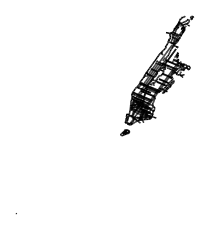

In [9]:
#now let's plot them: 

bike_lane[bike_lane['boro']==1].plot(color='k')
plt.axis('off')
plt.show()

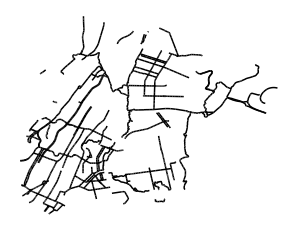

In [10]:
#plot the Brons bike lanes

bike_lane[bike_lane['boro']==2].plot(color='k')
plt.axis('off')
plt.show()

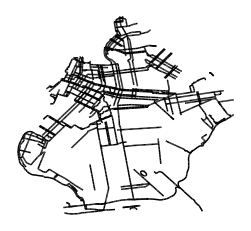

In [11]:
#plot bike lanes for Brooklyn only 
bike_lane[bike_lane['boro']==3].plot(color='k')
plt.axis('off')
plt.show()

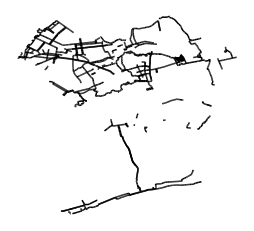

In [12]:
#plot Queens only: 
bike_lane[bike_lane['boro']==4].plot(color='k')
plt.axis('off')
plt.show()

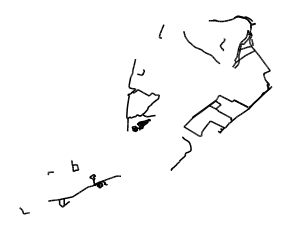

In [13]:
#and finaly, plot Staten Island 
bike_lane[bike_lane['boro']==5].plot(color='k')
plt.axis('off')
plt.show()

## Types of bikelanes

As we will see soon ,the NYC bike lane data can get us the specifics of the each bike lane type. Let's look into two columns to learn more about the types of bike lanes: 
1. ft_facilit
2. tf_facilit

In [14]:

bike_lane.ft_facilit.unique()

array([None, 'Standard', 'Greenway', 'Protected Path', 'Sharrows',
       'Curbside', 'Signed Route', 'Boardwalk', 'Bike-Friendly Parking',
       'Dirt Trail', 'Sidewalk', 'Buffered Conventional', 'Link',
       'Ped Plaza', '<Null>', 'Buffered'], dtype=object)

In [15]:

bike_lane.tf_facilit.unique()

array(['Sharrows', 'Standard', None, 'Greenway', 'Protected Path',
       'Bike-Friendly Parking', 'Signed Route', 'Boardwalk', 'Curbside',
       'Dirt Trail', 'Sharrows/Standard', 'Sidewalk', 'Buffered', 'Link',
       'Buffered Conventional', 'Standard/Sharrows', 'Curbside/Sharrows',
       'Velodrome', 'Ped Plaza', 'Sharrows/Protected Path'], dtype=object)

They both seem to have mostly the same categories, when ft_facilit seem to have slightly simpler. But the tf_facilit gives us more intresting details that's why I chose it. 

Let's plot the data so that it is diplayed only 

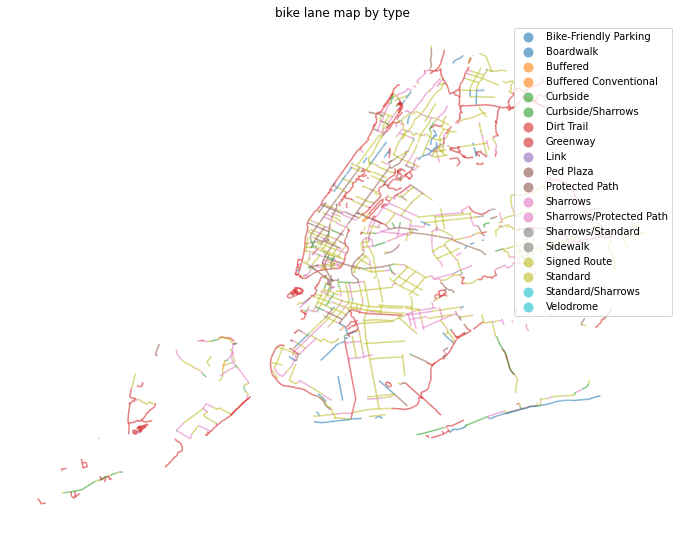

In [16]:
ax = bike_lane.plot(column='tf_facilit',legend=True,figsize=(12, 20), alpha = 0.6,markersize=2)

plt.title('bike lane map by type')

plt.axis('off')


plt.show()

In [17]:
#let's see the number of rows per unique value of bike path type: 
bike_lane['tf_facilit'].value_counts()

Standard                   4946
Sharrows                   2483
Greenway                   2320
Protected Path             1870
Curbside                    615
Bike-Friendly Parking       566
Signed Route                462
Boardwalk                   159
Sidewalk                    143
Dirt Trail                   64
Buffered Conventional        41
Buffered                     26
Ped Plaza                    14
Link                          8
Velodrome                     3
Curbside/Sharrows             2
Sharrows/Standard             2
Standard/Sharrows             1
Sharrows/Protected Path       1
Name: tf_facilit, dtype: int64

In [55]:
# plot only MN by bike lane type:

bike_laneMN = bike_lane[bike_lane['boro']==1]

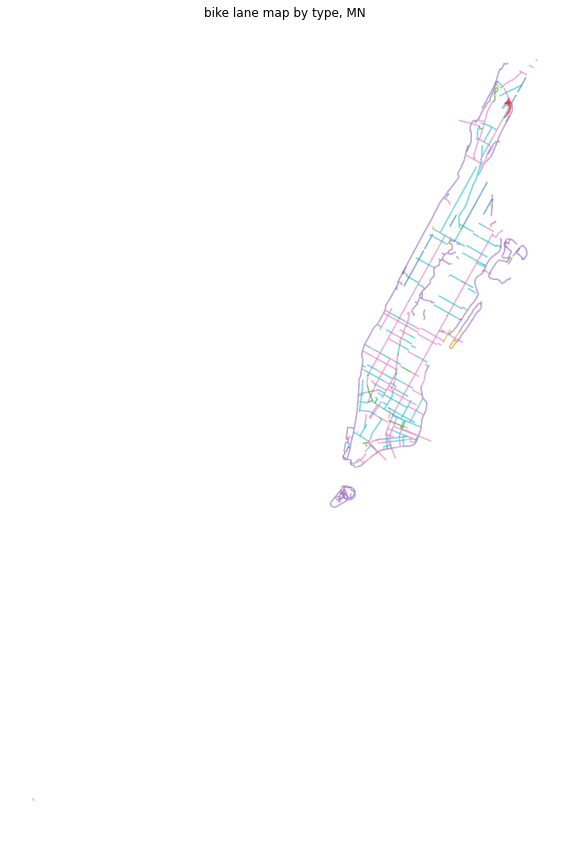

In [56]:
labels = bike_laneMN.tf_facilit

ax = bike_laneMN.plot(column='tf_facilit', figsize=(10, 15), alpha = 0.6,markersize=2)
#ax.legend()
plt.title('bike lane map by type, MN')

plt.axis('off')
#plt.xlim(500000,588000)
#plt.ylim(4200000,4520000)
plt.show()

## Ploygon data: Senior Priority Zones: 



In [24]:
safe_streeets = gpd.read_file("VZV_Safe Streets for Seniors")

In [25]:
safe_streeets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
safe_streeets.head()

,name,shape_area,shape_leng,geometry
0,Astoria,8.306479e+06,14763.582784,"POLYGON ((-73.91899 40.76577, -73.91978 40.766..."
1,Bath Beach,1.187964e+07,15515.138903,"POLYGON ((-73.99154 40.59039, -73.99161 40.590..."
2,Bay Ridge,1.475626e+07,21468.007297,"POLYGON ((-74.03382 40.61459, -74.03454 40.614..."
3,Bedford Stuyvesant,4.613148e+07,27438.609830,"POLYGON ((-73.92864 40.69324, -73.92804 40.692..."
4,Bensonhurst,2.399853e+07,23653.773218,"POLYGON ((-73.99015 40.59971, -73.99086 40.600..."


In [27]:
#what are the polygons area? 
safe_streeets.geometry.area.head()

0    0.000082
1    0.000117
2    0.000146
3    0.000457
4    0.000237
dtype: float64

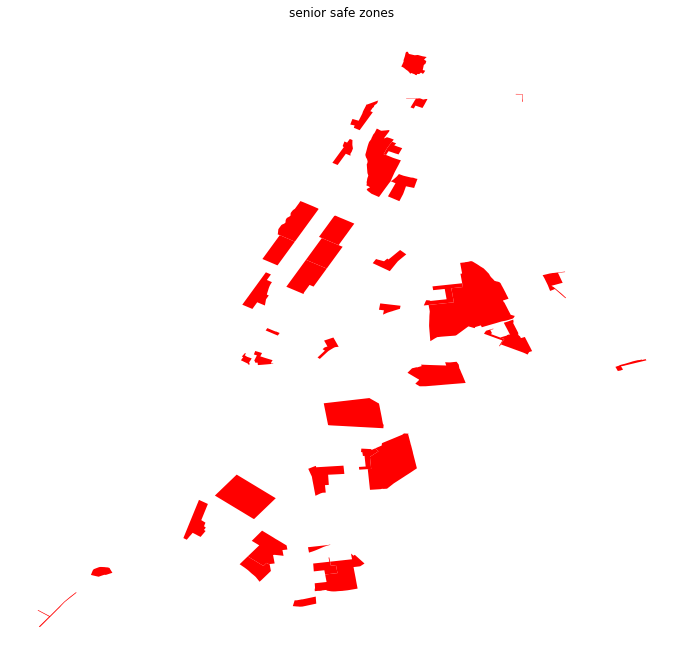

In [28]:

safe_streeets.plot(color='red',figsize=(12, 12),markersize=0.1)
plt.axis('off')
plt.title('senior safe zones')

plt.show()

## Add a point layer: senior centers 

Here we will add a layer of senior centers that the DOT works with. We will try to overlay one with the senior safe zone to see how many senior centers fall inside the safety zones. 

In [29]:
#load the shapfile
senior_centers = gpd.read_file("VZV_Senior Centers")

In [30]:
#what are the columns in the data
senior_centers.columns

Index(['activity', 'event_date', 'lat', 'long', 'site_serve', 'geometry'], dtype='object')

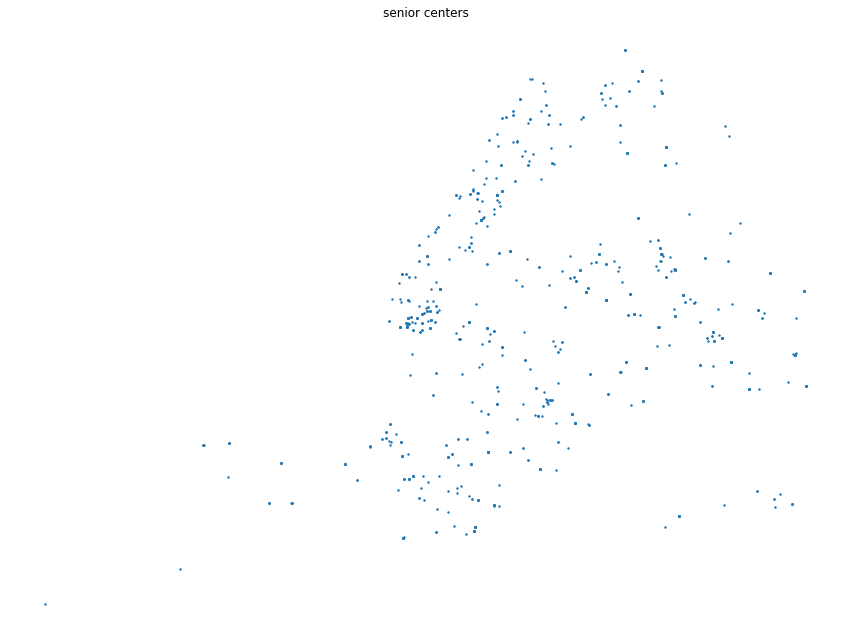

In [51]:
senior_centers.plot(figsize=(15, 15),legend=True,markersize=2)
plt.axis('off')
plt.title('senior centers')
plt.show()

# Overlay multiple layers on Pyplot: 

Can we intersect safe zones and senior centers?

In [53]:
#what is the projection of senior safe zones?
safe_streeets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
#what is the projection of senior centers?
senior_centers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Both look the same so we should be good to go with overlaying both. 

(-74.26504011945596, -73.70740009178658, 40.510574673913105, 40.91661409471997)

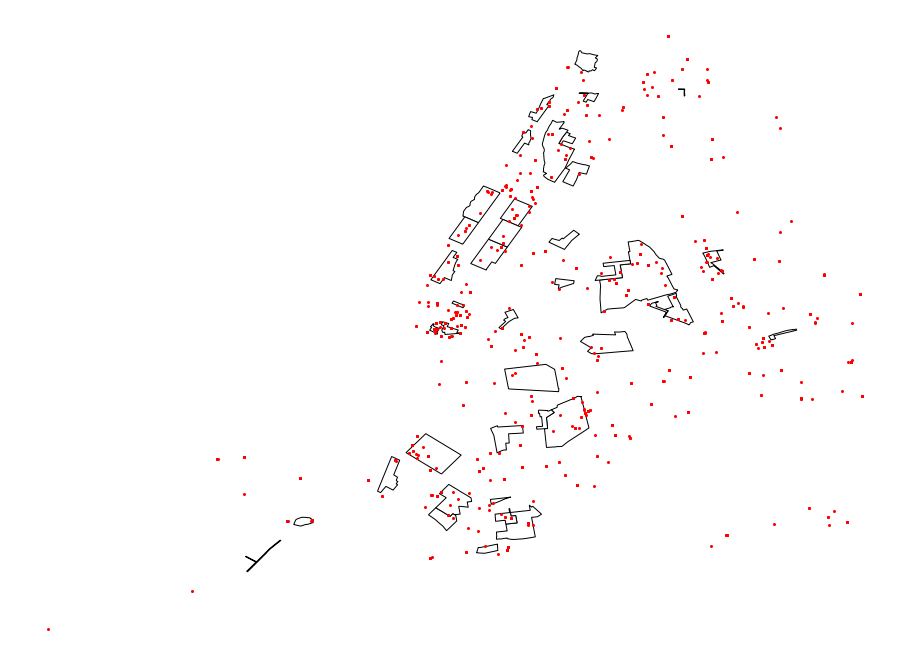

In [47]:
#first we need to set up the layer that is going to be used 
base = safe_streeets.plot(color='white',legend=True,figsize=(20, 12), edgecolor='black')
#now add the senior centers layer: 
senior_centers.plot(ax=base, marker='o', color='red', markersize=4);


plt.axis('off')

## Bonus: Add map background

In [36]:
import contextily as ctx

In [37]:
bike_lane = bike_lane.to_crs(epsg=3857)

In [38]:
# from:https://share.cocalc.com/share/56cef78b3fda5e0338c2da71b222e6b275a9193e/contextily.ipynb?viewer=share 

In [39]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    
    ax.axis((xmin, xmax, ymin, ymax))
    
    

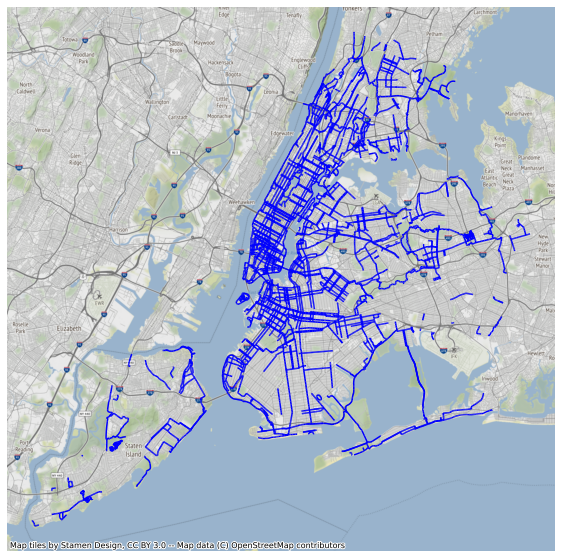

In [40]:
ax = bike_lane.plot(figsize=(10, 10), edgecolor='b')
ctx.add_basemap(ax, zoom=12)
ax.set_axis_off()